# Mexico City/Taxiroutes from 24/06/2016 to 20/07/2017

Data-visualization by Jessica Alcantara Rivera 
December 2017 
Elements of Computational Design, University of Sheffield DAAD. Module Leader:  Mark Meagher

I used a database from Kaggle under the name “Taxi Routes of Mexico City”. According to the source, data was collected from Taxi, Uber and Cabify trips using EC Taximeter over a period of 13 months from 24/06/2016 to 20/07/2017. The database contains 12653 taxi routes.
This is a very interesting database that can be used to have a quick and general understanding of the needs of transportation in the city that are not covered right now by public transportation. Therefore, the analysis could be used later to implement new lines of public transportation as metro, bus, or metro-bus.

The interest of the visual representation of this dataset relies on knowing more about how people's displacements in Mexico City
behave over time. I want to map data from Pickups and Drop Offs over this period of time and to discover relationships between the information.

Initial questions to address:
    1. What are the most commons taxi routes by time? 
    2.Where are the most common areas for pickups? 
    3.Where are the most common areas by drop Offs? 
    4.What relationships can be established between time and location? 


The data fields are very specific, the ones marked with (//) are the used in this study. Further improvements in the analysis can be made by considering other important fields such as the ones that contain Date Time.

/id - a unique identifier for each trip
/vendor_id - the type of fare entered by the user (taxi, Uber,Cabify)
/pickup_datetime - date and time when the meter was engaged
/dropoff_datetime - date and time when the meter was disengaged
/(//)pickup_longitude - the longitude where the meter was engaged
/(//)pickup_latitude - the latitude where the meter was engaged
/(//)dropoff_longitude - the longitude where the meter was disengaged
/(//)dropoff_latitude - the latitude where the meter was disengaged
/trip_duration - duration of the trip in seconds
/dist_meters - the distance of the trip in meters
/wait_sec - the time the car was completely stopped during the trip or waiting time in sec


In [1]:
import pandas as pd
df = pd.read_csv('mex_clean1.csv',header=0)
#Data Source : https://www.kaggle.com/carlosknows/taxis-in-mexico/data

mt = pd.read_csv('lineasmetro2.csv',header=0)
#Data Source; https://mextatistics.wordpress.com/2012/05/10/mapa-del-metro-del-df-en-rgooglemaps/#comment-14

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
from matplotlib import rcParams 


In [2]:
#df


In [3]:
#df.info()

In [4]:
#mt

In [5]:
#df.describe()

In [6]:
#plt.style.available

# First stage; exploring visually the dataset.

First visualization using two scatters, one for the pickups other for the dropoffs.
Also this is a quick exploration of the range of latitudes and longitudes that the dataset defines.

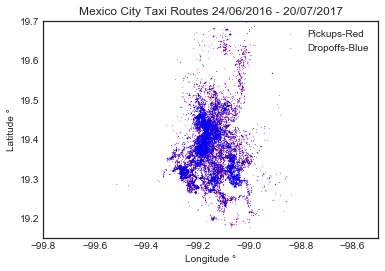

In [7]:
plt.style.use('seaborn-white')
#Scatter of pick-ups
# longitude as the x axis, latitude as the y axis
plt.scatter(df['pickup_longitude'], 
            df['pickup_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='r',
            # the alpha
            alpha=1,
            # with size
            s = .1,
            # labelled this
            label='Pickups-Red')

#Scatter of drop-offs
# longitude as the x axis, latitude as the y axis
plt.scatter(df['dropoff_longitude'], 
            df['dropoff_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='b',
            # the alpha
            alpha=1,
            # with size
            s = .1,
            # labelled this
            label='Dropoffs-Blue')

# Chart title
plt.title('Mexico City Taxi Routes 24/06/2016 - 20/07/2017')
# y label
plt.ylabel('Latitude °')
# x label
plt.xlabel('Longitude °')
# and a legend
plt.legend(loc='upper right')


#First limits
plt.xlim(-99.8, -98.5)
plt.ylim(19.15, 19.7)

plt.savefig('CDMX01.png', dpi = 350)
plt.show()



## Second stage; to set the dimensions of the study

The first output allowed to understand the dimensions of the data set. 
The result shows the city and  its metropolitan area.
That is why is necessary to make a zoom into the data, and re-define the new boundaries in order to achieve a more accurate visualization.
For creating the bounding-box I used the next link http://boundingbox.klokantech.com/
latitude(-99.31, -99.0)
Longitude(19.24, 19.55)
and plt.ylim and plt.xlim

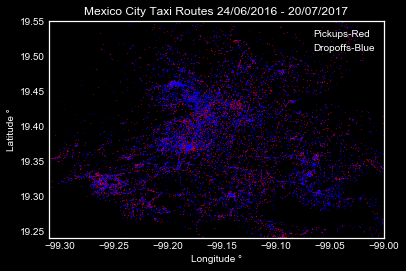

In [8]:
#Here a different style is used for the background.
plt.style.use('dark_background')

#Scatter of pick-ups
# longitude as the x axis, latitude as the y axis
plt.scatter(df['pickup_longitude'], 
            df['pickup_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='r',
            # the alpha
            alpha=1,
            # with size
            s = .1,
            # labelled this
            label='Pickups-Red')

#Scatter of drop-offs
# longitude as the x axis, latitude as the y axis
plt.scatter(df['dropoff_longitude'], 
            df['dropoff_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='b',
            # the alpha
            alpha=1,
            # with size
            s = .1,
            # labelled this
            label='Dropoffs-Blue')

# Chart title
plt.title('Mexico City Taxi Routes 24/06/2016 - 20/07/2017')
# x label
plt.xlabel('Longitude °')
# y label
plt.ylabel('Latitude °')

# and a legend
plt.legend(loc='upper right')
 
#To establish the limits mentioned above.
#Second limits
plt.xlim(-99.31, -99.0)
plt.ylim(19.24, 19.55)

plt.savefig('CDMX02.png', dpi = 350)
plt.show()


The plot shows very interesting facts:

There is some concentration of blue and red points in certain areas. That may be related to important cores of development of the city. For example at the center of the plot may be located the downtown, while at the north "Indios Verdes" which is a fundamental metro station that connects the entire north of the city with the suburbs. At the bottom of the plot should be "CU" which is the National University of Mexico, UNAM. At the left "Santa Fe" which is the new business core of the city and one of the challenges to address in terms of transportation for the coming years.

The plot is very clear in showing some general answers to some questions I formulated at the beginning.

2)Where are the most common areas for pickups?/ It seems that the Pickups (red dots) are more sprawled, so the pickups may occur at particular locations, as houses or another not- common places. Also, it appears to pop to the eye a peculiar situation, there are some concentrations of red dots, that are not related to concentrations of blue dots, this means, that people at this locations, only requires to being picked up, not dropped off, this may be a good question to answer later. It is the transportation system failing at some points at certain hours?.

3) Where are the most common areas by drop Offs? at first glance, it is very interesting that basically drop Offs gives an idea about the main streets of the city. Drop offs, may be related to main avenues, and cores of development. For example, "Reforma avenue at center", also "Constituyentes" at the left side. 

In [9]:
#defining the important information for this study, and separating it into groups.
pickup_lon = df.pickup_longitude
pickup_lat = df.pickup_latitude
dropoff_lon = df.dropoff_longitude
dropoff_lat = df.dropoff_latitude

# Third stage, to draw relationships between pickups and dropoffs.

The first thing I did at this stage was to think about how to visualize the relationships of the dots concentrations with core destinations.
So, I made a third scatter with the coordinates of metro-stations. This is a quick way of making spatial relationships with
landmarks at the city.

Another strategy I used here to establish a relationship between the two groups of coordinates was to draw an arc and represent the connection between each pickup with its corresponding dropoff.

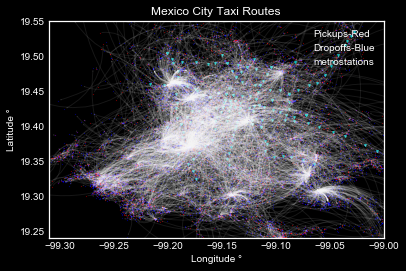

In [10]:

plt.style.use('dark_background')

#Here the process of making the lines between the two coordinates of points, was the most complicated part of my code
#because I created the patch format fancyarrowpatch and its parameters for POS A and POS B according with the documentation, 
#but I was not able to plot it within the scatter,I was missing the function, credits for the next three lines Binh Vinh Duc Nguyen.

ax = plt.gca() # This function is to get the axes of the chart in order to get more visualization to the same axes
for i in range (12653): # 12653 for the full map
    ax.add_patch(mpatches.FancyArrowPatch(posA=(pickup_lon[i], pickup_lat[i]), #add the patch into the axe
                         posB=(dropoff_lon[i], dropoff_lat[i]), 
                         path=None,
                         arrowstyle='->', arrow_transmuter=None, 
                         connectionstyle='arc3, rad = -0.3', connector=None, 
                         patchA=None, patchB=None, 
                         shrinkA=2, shrinkB=2, 
                         mutation_scale=1, 
                         mutation_aspect=None,
                         alpha=.09,
                         color='w' ))
#Scatter of pick-ups
# longitude as the x axis, latitude as the y axis
plt.scatter(df['pickup_longitude'], 
            df['pickup_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='r',
            # the alpha
            alpha=1,
            # with size
            s = .1,
            # labelled this
            label='Pickups-Red')


#Scatter of drop-offs
# longitude as the x axis, latitude as the y axis
plt.scatter(df['dropoff_longitude'], 
            df['dropoff_latitude'], 
            # the marker as
            marker='.', 
            # the color
            color='b',
            # the alpha
            alpha=1,
            # with size
            s = .09,
            # labelled this
            label='Dropoffs-Blue')

#Scatter of metrostations
# longitude as the x axis, latitude as the y axis
plt.scatter(mt['lon'], 
            mt['lat'], 
            # the marker as
            marker='v', 
            # the color
            color='c',
            # the alpha
            alpha=1,
            # with size
            s = 3,
            # labelled this
            label='metrostations')

# Chart title
plt.title('Mexico City Taxi Routes')
# x label
plt.xlabel('Longitude °')
# y label
plt.ylabel('Latitude °')

# and a legend
plt.legend(loc='upper right')
 
#To establish the limits mentioned above.
#Second limits
plt.xlim(-99.31, -99.0)
plt.ylim(19.24, 19.55)

plt.savefig('CDMX03.1.png', dpi = 350)

plt.show()





## Fourth stage: conclusions from the visual output.

![Mexico City Taxi Routes Pickups and Dropoffs from 24/06/2016 to 20/07/2017](https://jessicaalriv.files.wordpress.com/2017/12/cdmx03.png?w=768)
             
                 Mexico City Taxi Routes from 24/06/2016 to 20/07/2017 

1.There are four main bright areas, three of them are within the net of the metro. But the last one, with coordinates closer to the point (-99.27,19.33),"Santa Fe" is not connected by an efficient and massive urban transportation. All the displacements to this area must to be performed by car or bus. This may be strongly related to the number of trips by taxi. Also, it is interesting to see that this area is mainly red what means that pickups happen often than dropoffs. Another feature of this zone is that the colored area is less compact than the other tree, this means that the area is growing in a sprawled manner. Without any clear and defined cores, this might be a potential problem later while addressing pedestrian-focused urban strategies.




![Mexico City Taxi Routes Pickups and Dropoffs from 24/06/2016 to 20/07/2017](https://jessicaalriv.files.wordpress.com/2017/12/cdmx03-3000.png?w=768)
             
                 Mexico City Taxi Routes from 24/06/2016 to 20/07/2017 3000 paths

![Mexico City Taxi Routes Pickups and Dropoffs from 24/06/2016 to 20/07/2017](https://jessicaalriv.files.wordpress.com/2017/12/cdmx03-4000.png?w=768)
             
                 Mexico City Taxi Routes from 24/06/2016 to 20/07/2017 4000 paths

2.Very long trips are performed "to" or "from" downtown in a "west to east" or "east to west" direction. The target seems to be at  (-99.18,19.37), if I insert this coordinates in bing, it gives me the location of "Chapultepec" and "Paseo de la Reforma" very important destinations of the city in terms of connectivity. This shows the lack of connectivity in the X-axis in a public massive transportation system. Here would be very interesting to have a path displaying the origin and destination with different colors. It is a very good idea for further improvements. 




![Mexico City Taxi Routes Pickups and Dropoffs from 24/06/2016 to 20/07/2017](https://jessicaalriv.files.wordpress.com/2017/12/cdmx03-10000.png?w=768)
             
                 Mexico City Taxi Routes from 24/06/2016 to 20/07/2017 10000 paths


![Mexico City Taxi Routes Pickups and Dropoffs from 24/06/2016 to 20/07/2017](https://jessicaalriv.files.wordpress.com/2017/12/cdmx03-12600.png?w=768)
             
                 Mexico City Taxi Routes from 24/06/2016 to 20/07/2017 12653 paths


The final plot shows clearly the most important origins and destinations in Mexico City, the main idea for urban planning should be to try to diminish the strength of the paths for the coming years by inserting strategic lines of public massive transportation systems that can connect this targets in an efficient way.


## About the partially-answered initial questions.

  1. What are the most common taxi routes by time? /This question is partially answered because the scope of the analysis did not include the time module. So the most common routes are known, while everything about their periodicity is ignored.

 2.and 3. See answers along the analysis.

 4.What relationships can be established between time and location? / Further improvements may respond this question, by separating the source data in blocks of time, and plot them with different formats. 
